In [3]:
import numpy as np
import matplotlib.pyplot as plt

[array([1.39680168, 3.53459881]), array([3.46199085, 2.3474226 ])]
[[0. 0.]
 [1. 0.]
 [3. 3.]
 [3. 3.]]


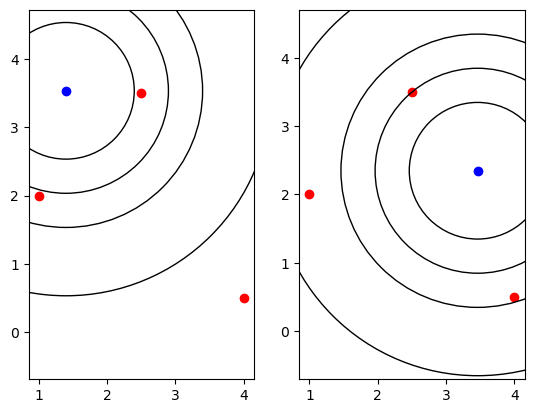

In [ ]:
def periodic_distance_matrix(center_point, position_arr, L):
    """
    Compute a distance matrix under periodic boundary conditions.
    
    Parameters:
    - Center point: A tuple of coordinates (x, y, ... Ndim).
    - A: Arr of points in format (Npoints, Ndim)
    - L: Length of the square domain in each dimension.
    
    Returns:
    - distance_matrix: A numpy array of distances modulus L with shape (Npoints).
    """
    
    min_func_vectorized = lambda x: np.minimum(x, L - x)

    dr = np.abs(position_arr - center_point)
    dR = np.apply_along_axis(min_func_vectorized, axis = 1, arr = dr)
    distance_arr = np.sqrt((dR**2).sum(axis = 1))   
    
    return distance_arr


def calc_density_fluctuations_periodic(points_arr, window_sizes, side_length, N_center_points=1,):
    """
    Calculates the density fluctuations for a set of points in a 2D plane for different window sizes.
    For each window_size (i.e. radius), the density fluctuations are calculated by choosing N_center_points random points
    inside a region determined by dist_to_boundaries and calculating the number of points within a circle of radius R for each
    of these points, from which the number and density variance can be calculated.

    Parameters:
    -----------
    points_arr : (numpy array) - Array of points in 2D plane in format (Npoints, 2) located within the square domain [0, side_length] x [0, side_length]
    window_sizes : (numpy array) - Array of window sizes (i.e. radii) for which to calculate density fluctuations
    side_length : (float) - Length of the square domain in each dimension   
    N_center_points : (int) - Number of center points to use for each window size. If None, all points are used.

    Returns:
    --------
    av_counts : (numpy array) - Array containing the number of points for each window and windowsize in format (Nwindows, Ncenterpoints)
    """

    # Initialize density array, density variance array, and counts variance arrays
    counts = np.zeros((len(window_sizes), N_center_points))

    for j in range (N_center_points):

        # generate random center points
        center_point = np.random.rand(2) * side_length

        # Calculate distance matrix
        distance_matrix = periodic_distance_matrix(center_point, points_arr, L = side_length)

        # Calculate number of points within each window size
        counts[:,j] = (distance_matrix < window_sizes[:,None]).sum(axis=1)

    return counts

# Example usage
center_point = (0.5, 0.5,)
A = np.array([(4, 0.5,), (2.5, 3.5,), (1.0, 2.0,)])

L = 4
distance_matrix = periodic_distance_matrix(center_point, A, L)
rad_arr = np.array([1.0, 1.5, 2.0, 3.0])
counts, XX = calc_density_fluctuations_periodic(A, rad_arr, 4, N_center_points=2)
print(XX)
print(counts)
#distance_matrix = periodic_distance_matrix(XX, A, L)
#print(distance_matrix)

fig, ax = plt.subplots(ncols=int(counts.shape[-1]))

for i in range(counts.shape[-1]):

    ax[i].scatter(A[:,0], A[:,1], c='r')
    ax[i].scatter(XX[i][0], XX[i][1], c='b')   
    ax[i].axis('equal')  

    # draw circles
    for j in range(len(rad_arr)):   
        circle = plt.Circle(XX[i], rad_arr[j], fill=False)
        ax[i].add_artist(circle,)


In [34]:
rad

array([0., 1., 2., 3., 4.])

In [46]:
X = np.ones(6)
X[-1] = 2
rad = np.linspace(0,4,5)
rad = [0,1,2,3,4]

mask = X<rad[:,None]

print(mask, mask.sum(axis=1))

TypeError: list indices must be integers or slices, not tuple